## What is an Index Price?

An index price refers to the weighted average price of a selected group of assets (like stocks, commodities, or bonds) that represents a particular market or sector. It is used as a benchmark to track the overall performance of that market.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index=pd.read_csv('economic_index.csv')

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [12]:
## drop unneseccery column:
df_index.drop(["Unnamed: 0","year", "month"], axis=1, inplace=True)

In [13]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [15]:
## check null values:
df_index.isnull().sum() ## no null values

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

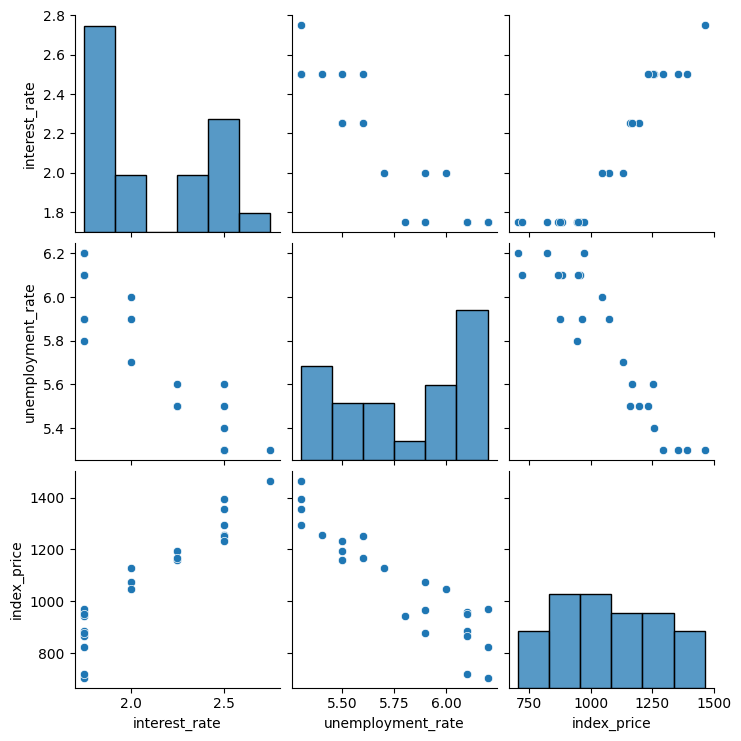

In [18]:
## visualisation:
import seaborn as sns
sns.pairplot(df_index)

In [ ]:
df_index.corr() ## df_index.corr() computes the correlation matrix between all numeric columns in the DataFrame df_index. It measures how strongly pairs of variables are linearly related, ranging from -1 to +1.

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

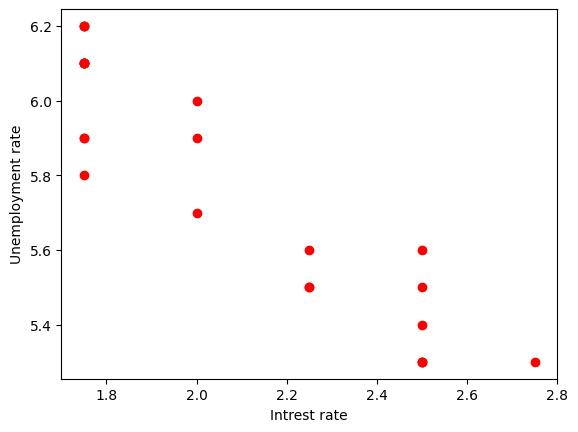

In [22]:
## visualise the dataset more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Intrest rate")
plt.ylabel("Unemployment rate")

In [28]:
## dependent and undependent feature:
X=df_index[['interest_rate', 'unemployment_rate']]
X.head()


,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [29]:
y=df_index['index_price']
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [30]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [31]:
X_train.shape

(18, 2)

<Axes: xlabel='interest_rate', ylabel='index_price'>

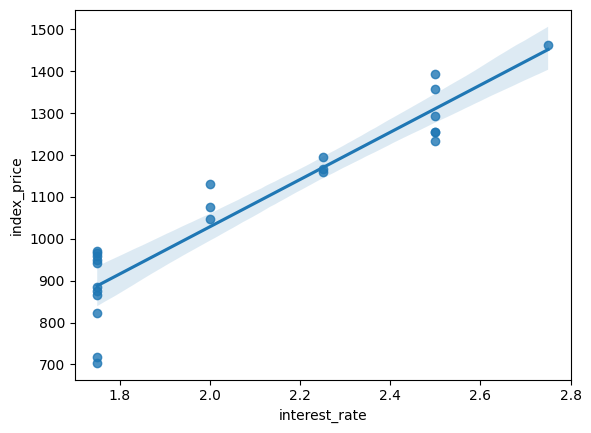

In [ ]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price']) #seaborn.regplot() (short for regression plot) creates a scatter plot of two numeric variables and fits a regression line to show their linear relationship. It’s a powerful tool for visualizing trends and correlations in data.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regression = LinearRegression()

In [39]:
regression.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.model_selection import cross_val_score ## cross_val_score is a super important tool in model evaluation — especially when you want to avoid overfitting and get a more reliable accuracy of your model.

##It performs cross-validation — which means:
#   You split your data into multiple chunks (called "folds") and train/test your model on different combinations of those chunks.

#Instead of just one train-test split, it checks performance across multiple test sets.


In [ ]:
## cross validation

validation_score=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
## this splits the train data in two parts one is train and second is validation and then it calculates the neg mean sq error in parts and than we take avg of those nmse

In [46]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [48]:
## Prediction:
y_pred=regression.predict(X_test)

In [49]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [50]:
## Performance matrix:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306607
73.80444932337097
90.04758423359623


In [52]:
from sklearn.metrics import r2_score

In [53]:
score=r2_score(y_test, y_pred)
print(score)

0.7591371539010257


In [54]:
# disptay adjusted R-sq 
print(1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.5985619231683761


## Assumption

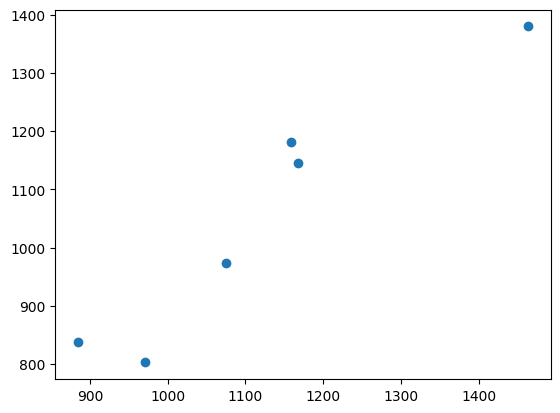

In [55]:
plt.scatter(y_test, y_pred)

In [59]:
residuals = y_test-y_pred
print(residuals) ## Residual = Actual Value − Predicted Value 
##Think of residuals as the error between what your model predicts and what actually happened.

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


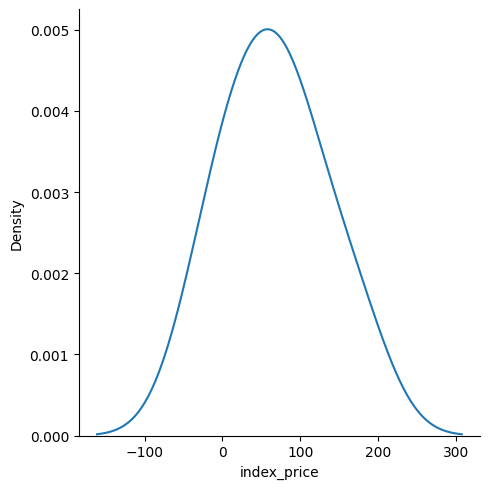

In [61]:
## Plot this residuals 
sns.displot(residuals, kind='kde')

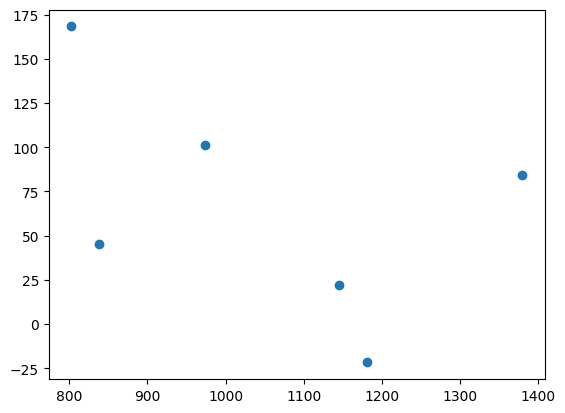

In [62]:
## scatter plot wrt recidual and prediction
plt.scatter(y_pred,residuals)

In [63]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit() ## It's exactly what LinearRegression() in scikit-learn does — just that statsmodels gives more detailed statistical output.
prediction = model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [66]:
model.summary()

/Users/krish/Desktop/work/ML/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 25 Jul 2025   Prob (F-statistic):                       0.754
Time:                        22:38:34   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(regression.coef_)

[  88.27275507 -116.25716066]
